# Constrained Minimization 
In this notebook, we use the `scipy` library to solve a constrained minimizaion problem. More specifically, we solve the simple example described in [Lecture #2](https://ocw.mit.edu/courses/16-323-principles-of-optimal-control-spring-2008/resources/lec2/), wherein the solution was previously obtained using an analytical approach. To formally state this problem, we seek the minimum of $F: \mathbb{R}^2 \rightarrow \mathbb{R}$, given by: 

$$ F(x_1, x_2) := x_1^2 + x_1 x_2 + x_2^2 $$

and subject to the (innequality) constraints: 

$$ x_2 \geq 1$$
$$ x_1 + x_2 \leq 3$$

Once again, a simple implementation of the objective function is as follows: 

In [283]:
def func(x : list) -> float: 
    """ Implementation of the objective function """
    return x[0]**2 + x[0]*x[1] + x[1]**2 

Let us plot this function on the domain $[-10, 10) \times [-10, 10)$, with the constraints $x_2 = 1$ and $x_1 + x_2 = 3$ shown for reference:  

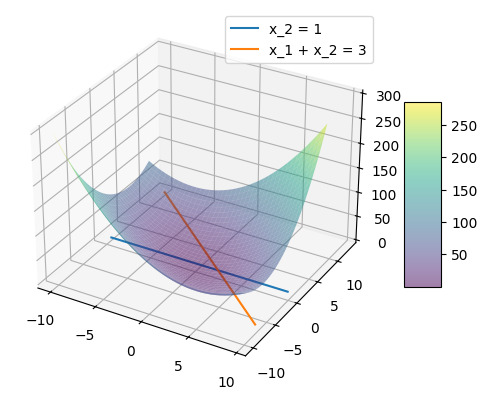

In [284]:
import numpy as np 
import matplotlib.pyplot as plt 

from matplotlib import cm

fig1, ax1 = plt.subplots(subplot_kw={"projection":"3d"}) 

# Specify the domain 
x_1 = np.arange(-10, 10, 0.5) 
x_2 = np.arange(-10, 10, 0.5) 
x_1, x_2 = np.meshgrid(x_1, x_2) 

# Evaluate objective function on the domain 
objective_func = func([x_1, x_2]) 

# Constraints 
y_1 = np.array([1] * len(x_1))
y_2 = np.array([ (3 - x_1[i]) for i in range(len(x_1))])

# Plot the objective function 
surf = ax1.plot_surface(x_1, x_2, objective_func, cmap=cm.viridis, linewidth=0, antialiased=True, alpha=0.50)

# Add a color bar and plot 
fig1.colorbar(surf, shrink=0.5, aspect=5)

# Plot constraints 
plt.plot(x_1, y_1, label="x_2 = 1")
plt.plot(x_1, y_2, label="x_1 + x_2 = 3")

plt.legend()
plt.show()

One can readily see that the feasible region is the region of the domain above (and including) the blue curve, since $x_2 \geq 1$, and to the left of (and once again including) the orange curve, since $x_1 + x_2 \leq 3 \Rightarrow x_2 \leq 3 - x_1$. Let us exclusivley plot these curves and shade the feasible region for clarity: 

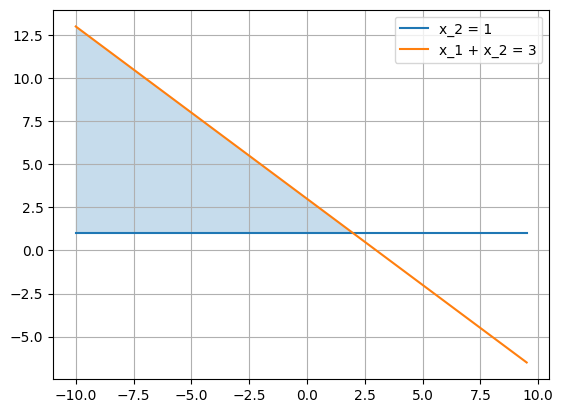

In [285]:
fig2, ax2 = plt.subplots()    

x   = np.arange(-10, 10, 0.5)
y_2 = np.array([(3 - x[i]) for i in range(len(x))])

# Plot constraints 
ax2.plot(x, y_1, label="x_2 = 1")
ax2.plot(x, y_2, label="x_1 + x_2 = 3")
ax2.legend()

# Vertices of feasible region (on domain)
v_0 = [-10, 1] 
v_1 = [-10, 13]
v_2 = [  2, 1] 

# Shade the feasbile region 
plt.fill([v_0[0],v_1[0],v_2[0],v_0[0]],
         [v_0[1],v_1[1],v_2[1],v_0[1]],alpha=0.25)
plt.grid()
plt.show()

To perform constrained minimization, we use the SLSQP method (`method="SLSQP"`) and an initial guess vector of $x_0 := [0, 0]$. Our implementation is as follows: 

In [286]:
from scipy.optimize import minimize

# Define the constraints 
ineq_cons = {'type' : 'ineq',
              'fun' :  lambda x: np.array([ 
                 x[1] - 1,       # First constraint:          x_2 - 1 >= 0 
                -x[0] - x[1] + 3 # Second constraint: - x_1 - x_2 + 3 >= 0 
              ])} 

# Initial guess vector
x0  = [0, 0]

# Minimize using SLSQP method 
res = minimize(func, x0, method='SLSQP', 
                         constraints=ineq_cons, 
                         options={'disp' : True})
print("Minimum Computed:")
print(res.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7500000000000004
            Iterations: 5
            Function evaluations: 16
            Gradient evaluations: 5
Minimum Computed:
[-0.50000001  1.        ]


Indeed, we find that our solver converges (5 iterations) to the solution $x^* = [-1/2, 1]$, which agrees with the analytical solution found in the Lecture Notes. Additionally, it is clear that this solution satisfies the constraints since $x^*_2 = 1 \geq 1$ and $x^*_1 + x^*_2 = 1/2 \leq 3$, such that it lies in the previously identified feasible region. Let us plot this region once more, with our solution highlighted: 

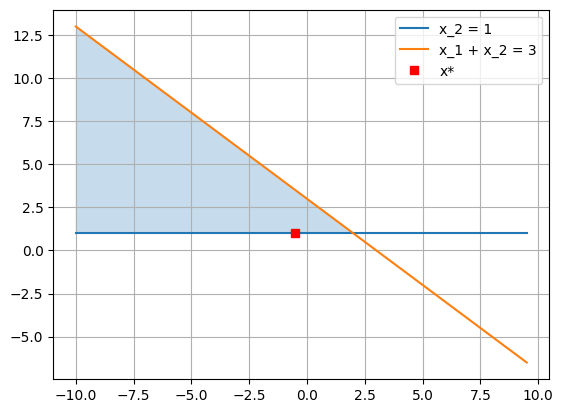

In [287]:
fig3, ax3 = plt.subplots()    

# Plot constraints + solution 
ax3.plot(x, y_1, label="x_2 = 1")
ax3.plot(x, y_2, label="x_1 + x_2 = 3")
ax3.plot(res.x[0], res.x[1], 'rs', label="x*")
ax3.legend()

# Shade the feasbile region 
plt.fill([v_0[0],v_1[0],v_2[0],v_0[0]],
         [v_0[1],v_1[1],v_2[1],v_0[1]],alpha=0.25)
plt.grid()
plt.show()

We further add the solution to our 3D plot: 

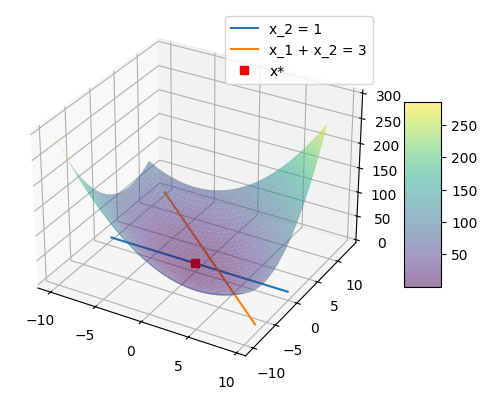

In [288]:
fig4, ax4 = plt.subplots(subplot_kw={"projection":"3d"}) 

# Plot the objective function 
surf = ax4.plot_surface(x_1, x_2, objective_func, cmap=cm.viridis , linewidth=0, antialiased=True, alpha=0.50)

# Add a color bar and plot 
fig4.colorbar(surf, shrink=0.5, aspect=5)

# Plot constraints 
plt.plot(x_1, y_1, label="x_2 = 1")
plt.plot(x_1, y_2, label="x_1 + x_2 = 3")

# Add solution 
ax4.plot(res.x[0], res.x[1], func(res.x), 'rs', label="x*")

plt.legend()
plt.show()